**PRAKTIKUM TM 6**

Nama : Nadila Fitri Noviardhana
NIM  : 164221006
Kelas : SD - A1

# Import Library dan Load Data

In [79]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa                 
import numpy as np             
from sklearn.preprocessing import StandardScaler  
import umap                    

datake = 0
file = os.listdir('./set_b')[datake]
wav_file = wave.open('./set_b/'+file, 'rb')

num_channels = wav_file.getnchannels()
sample_width = wav_file.getsampwidth()
frame_rate = wav_file.getframerate()
num_frames = wav_file.getnframes()
duration = num_frames / float(frame_rate)  

print(f"Channels: {num_channels}")
print(f"Sample Width: {sample_width} bytes")
print(f"Frame Rate: {frame_rate} Hz")
print(f"Number of Frames: {num_frames}")
print(f"Duration: {duration:.2f} seconds")

Channels: 1
Sample Width: 2 bytes
Frame Rate: 4000 Hz
Number of Frames: 42385
Duration: 10.60 seconds


# Grafik Gelombang Suara

Audio Array: [-204 -117   90 ...  495  575  594]
Array Shape: (42385,)


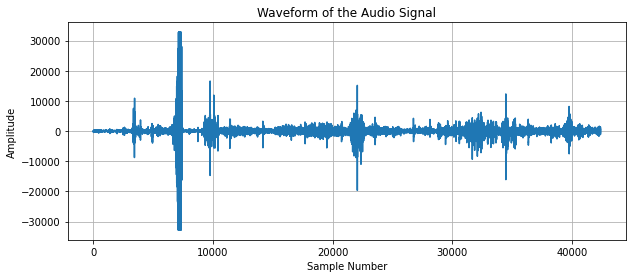

In [47]:
frames = wav_file.readframes(num_frames)
wav_file.close()                          

audio_data = np.frombuffer(frames, dtype=np.int16)

if num_channels > 1:
    audio_data = np.reshape(audio_data, (-1, num_channels))

print("Audio Array:", audio_data)
print("Array Shape:", audio_data.shape)

plt.figure(figsize=(10, 4))
if num_channels > 1:
    plt.plot(audio_data[:, 0])  
else:
    plt.plot(audio_data)        
plt.title('Waveform of the Audio Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Preprocessing
## Ekstraksi Fitur

In [48]:
import librosa

mfccs = librosa.feature.mfcc(y=audio_data.astype(float), sr=frame_rate, n_mfcc=13)

## Normalisasi

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(mfccs.T)

## Reduksi Dimensi

In [50]:
umap_reducer = umap.UMAP(n_components=2, random_state=42)
features_umap = umap_reducer.fit_transform(features_scaled)


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


### Visualisasi UMAP

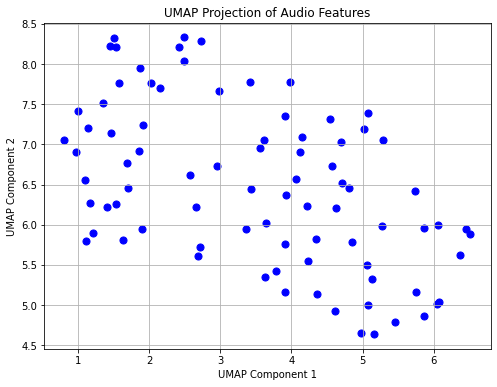

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(features_umap[:, 0], features_umap[:, 1], s=50, c='blue')
plt.title('UMAP Projection of Audio Features')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid()
plt.show()

# Algoritma Clustering
## KMEANS
### Elbow Method KMEANS

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

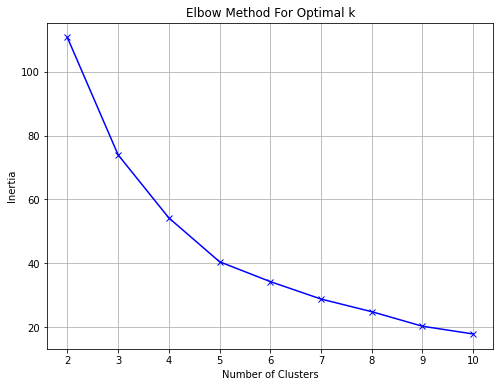

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

cluster_range = range(2, 11)  
inertia_values = [] 
silhouette_values = []  

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features_umap)

    inertia_values.append(kmeans.inertia_)


    silhouette_avg = silhouette_score(features_umap, cluster_labels)
    silhouette_values.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()


### Silhouette Score

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


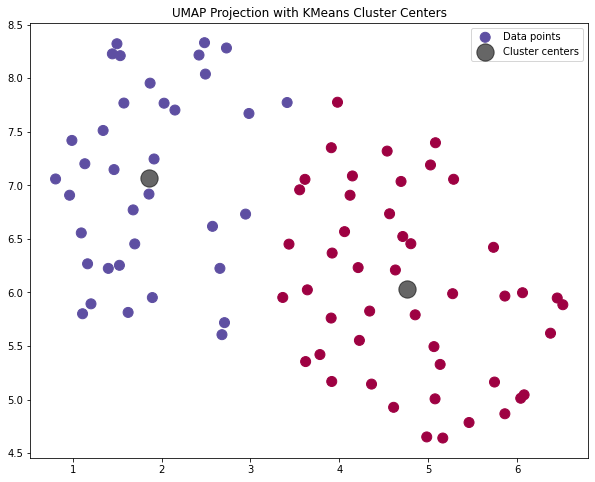

KMeans Silhouette Score: 0.5203


In [75]:
from sklearn.cluster import KMeans   
from sklearn.metrics import silhouette_score

n_clusters = 2 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(features_umap)

plt.figure(figsize=(10, 8))
plt.scatter(features_umap[:, 0], features_umap[:, 1], c=y_kmeans, cmap='Spectral', s=100, label='Data points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=300, alpha=0.6, label='Cluster centers')
plt.title('UMAP Projection with KMeans Cluster Centers')
plt.legend()
plt.show()

silhouette_kmeans = silhouette_score(features_umap, y_kmeans)
print(f"KMeans Silhouette Score: {silhouette_kmeans:.4f}")

## DBSCAN

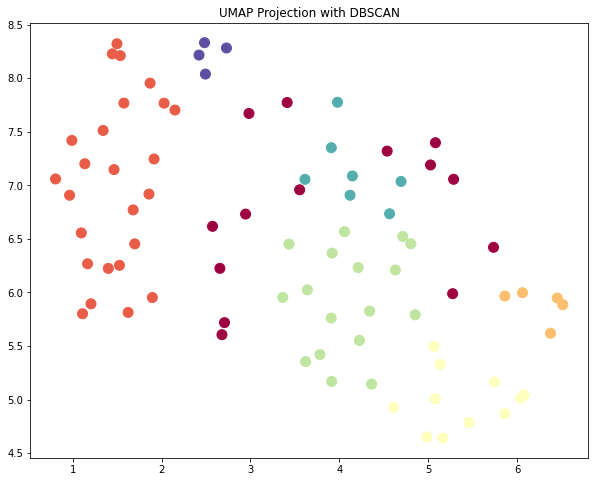

DBSCAN Silhouette Score: 0.3615


In [55]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  
y_dbscan = dbscan.fit_predict(features_umap)

plt.figure(figsize=(10, 8))
plt.scatter(features_umap[:, 0], features_umap[:, 1], c=y_dbscan, cmap='Spectral', s=100, label='Data points')
plt.title('UMAP Projection with DBSCAN')
plt.show()

valid_clusters = y_dbscan != -1
if valid_clusters.any():
    silhouette_dbscan = silhouette_score(features_umap[valid_clusters], y_dbscan[valid_clusters])
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.4f}")
else:
    print("No valid clusters found in DBSCAN.")


## Gaussian Mixture
### Elbow Method

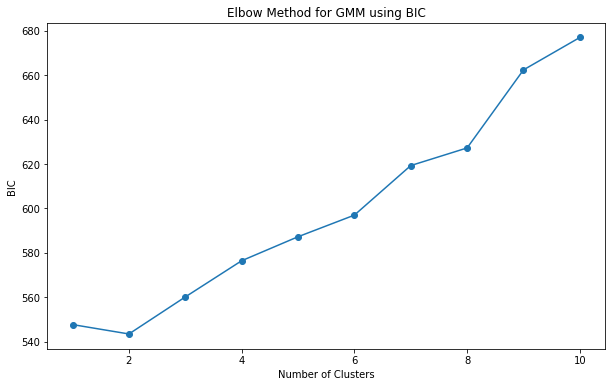

Best number of clusters: 2


In [59]:
from sklearn.mixture import GaussianMixture
import numpy as np

n_clusters_range = range(1, 11)
bics = []

for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(features_umap)
    bics.append(gmm.bic(features_umap))  

plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, bics, marker='o')
plt.title('Elbow Method for GMM using BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.show()

best_n_clusters = n_clusters_range[np.argmin(bics)]
print(f"Best number of clusters: {best_n_clusters}")


### Silhouette Score

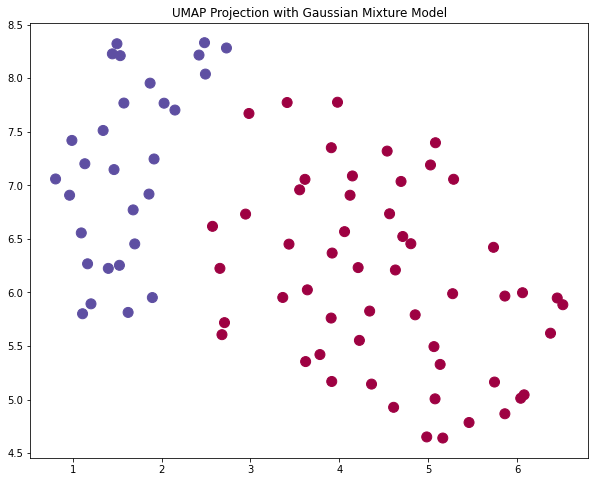

Gaussian Mixture Model Silhouette Score: 0.4920


In [73]:
from sklearn.mixture import GaussianMixture

best_n_clusters = 2

gmm = GaussianMixture(n_components=best_n_clusters, random_state=42)
y_gmm = gmm.fit_predict(features_umap)

plt.figure(figsize=(10, 8))
plt.scatter(features_umap[:, 0], features_umap[:, 1], c=y_gmm, cmap='Spectral', s=100, label='Data points')
plt.title('UMAP Projection with Gaussian Mixture Model')
plt.show()

silhouette_gmm = silhouette_score(features_umap, y_gmm)
print(f"Gaussian Mixture Model Silhouette Score: {silhouette_gmm:.4f}")


## Mean Shift

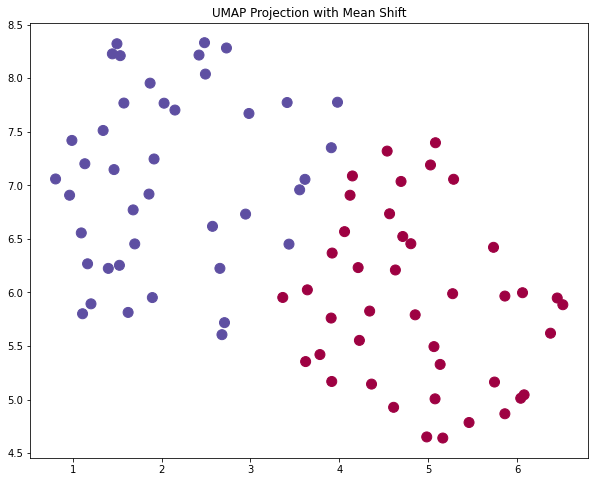

Mean Shift Silhouette Score: 0.5020


In [72]:
from sklearn.cluster import MeanShift

mean_shift = MeanShift()
y_mean_shift = mean_shift.fit_predict(features_umap)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
plt.scatter(features_umap[:, 0], features_umap[:, 1], c=y_mean_shift, cmap='Spectral', s=100, label='Data points')
plt.title('UMAP Projection with Mean Shift')
plt.show()

silhouette_mean_shift = silhouette_score(features_umap, y_mean_shift)
print(f"Mean Shift Silhouette Score: {silhouette_mean_shift:.4f}")


## Birch

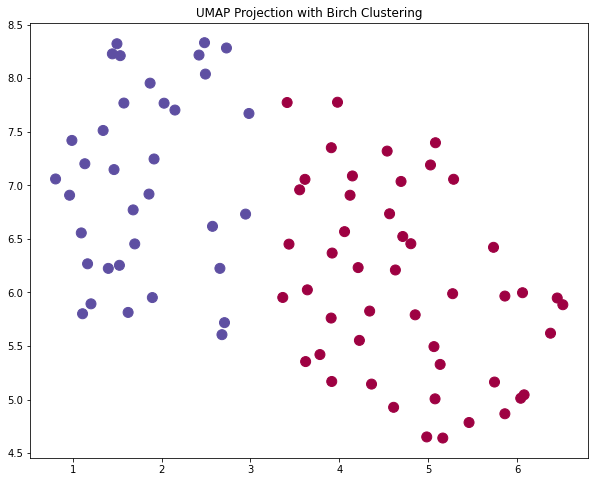

Birch Silhouette Score: 0.5174


In [83]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=2)  
y_birch = birch.fit_predict(features_umap)

plt.figure(figsize=(10, 8))
plt.scatter(features_umap[:, 0], features_umap[:, 1], c=y_birch, cmap='Spectral', s=100, label='Data points')
plt.title('UMAP Projection with Birch Clustering')
plt.show()

silhouette_birch = silhouette_score(features_umap, y_birch)
print(f"Birch Silhouette Score: {silhouette_birch:.4f}")


# Perbandingan Silhouette Score

KMeans Silhouette Score: 0.5203
DBSCAN Silhouette Score: 0.3615
GMM Silhouette Score: 0.4920
Mean Shift Silhouette Score: 0.5020
Birch Silhouette Score: 0.5174


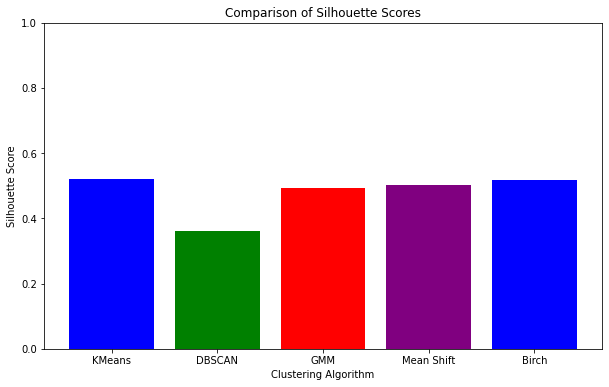

In [89]:

# Membandingkan Semua Silhouette Scores
scores = {
    'KMeans': silhouette_kmeans,
    'DBSCAN' : silhouette_dbscan,
    'GMM': silhouette_gmm, 
    'Mean Shift' : silhouette_mean_shift,
    'Birch': silhouette_birch }

# Print semua skor
for algo, score in scores.items():
    print(f"{algo} Silhouette Score: {score:.4f}")

# Visualisasi Perbandingan Silhouette Scores
plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Comparison of Silhouette Scores')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)
plt.show()